# Two stock portfolio analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nsepy
import quandl
import datetime
from scipy import stats

In [2]:
start = datetime.date(year=2022, month=1, day=1)
end = datetime.date(year=2022, month=8, day=30)

In [3]:
df1 = nsepy.get_history('AXISBANK', start=start, end=end)
df2 = nsepy.get_history('ICICIBANK', start=start, end=end)

In [5]:
df1['adj_close'] = df1['Close']/df1['Close'].iloc[0]
df2['adj_close'] = df2['Close']/df2['Close'].iloc[0]

### Plotting cumulative returns

Text(0.5, 1.0, 'Cumulative Return')

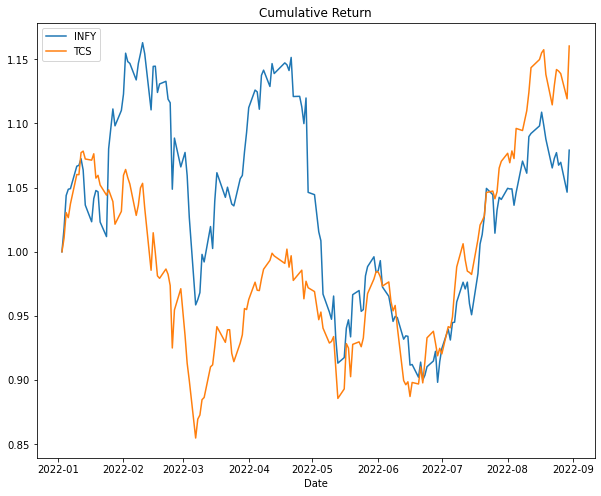

In [6]:
df1['adj_close'].plot(label='INFY',figsize=(10,8))
df2['adj_close'].plot(label='TCS')
plt.legend()
plt.title('Cumulative Return')


In [7]:
df1['Daily Return'] = df1['Close'].pct_change(1)
df2['Daily Return'] = df2['Close'].pct_change(1)

In [8]:
df1.dropna(axis = 0, inplace = True)
df2.dropna(axis = 0, inplace = True)

In [9]:
print(df1.tail(1))
print(df2.tail(1))

              Symbol Series  Prev Close   Open    High    Low   Last  Close  \
Date                                                                          
2022-08-30  AXISBANK     EQ       728.7  733.0  753.55  733.0  751.5  751.5   

              VWAP   Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                    
2022-08-30  745.03  9193270  6.849246e+14  150100             5592300   

            %Deliverble  adj_close  Daily Return  
Date                                              
2022-08-30       0.6083   1.079199      0.031289  
               Symbol Series  Prev Close   Open    High    Low   Last  Close  \
Date                                                                           
2022-08-30  ICICIBANK     EQ      855.85  860.5  890.75  859.1  889.0  887.3   

              VWAP    Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                     


### Defining our trend criteria

In [10]:
def trend(x):
  if x > -0.005 and x <= 0.005:
    return "Slight or No_change"
  elif x > 0.005 and x <= 0.01:
    return "Slight_Positive"
  elif x > -0.01 and x <= -0.005:
    return "Slight_Negative"
  elif x > 0.01 and x <= 0.03:
    return "Positive"
  elif x > -0.03 and x <= -0.01:
    return "Negative"
  elif x > 0.03 and x <= 0.07:
    return "Among_top_gainers"
  elif x > -0.07 and x <= -0.03:
    return "Among_top_losers"
  elif x > 0.07:
    return "Bull_run"
  elif x <= -0.07:
    return "Bear_drop"

In [11]:
df1['Trend']= np.zeros(df1['Daily Return'].count())
df1['Trend']= df1['Daily Return'].apply(lambda x:trend(x))
df1['Trend']

Date
2022-01-04               Positive
2022-01-05               Positive
2022-01-06    Slight or No_change
2022-01-07    Slight or No_change
2022-01-10               Positive
                     ...         
2022-08-24    Slight or No_change
2022-08-25        Slight_Negative
2022-08-26    Slight or No_change
2022-08-29               Negative
2022-08-30      Among_top_gainers
Name: Trend, Length: 163, dtype: object

In [12]:
df2['Trend']= np.zeros(df2['Daily Return'].count())
df2['Trend']= df2['Daily Return'].apply(lambda x:trend(x))
df2['Trend']

Date
2022-01-04               Positive
2022-01-05               Positive
2022-01-06    Slight or No_change
2022-01-07               Positive
2022-01-10               Positive
                     ...         
2022-08-24               Positive
2022-08-25    Slight or No_change
2022-08-26    Slight or No_change
2022-08-29               Negative
2022-08-30      Among_top_gainers
Name: Trend, Length: 163, dtype: object

### Plotting trend wise pie chart 

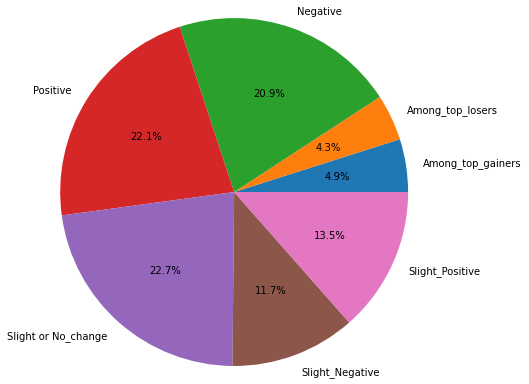

In [13]:
pie_data = df1.groupby('Trend')

pie_label = sorted([i for i in df1.loc[:, 'Trend'].unique()])

plt.pie(pie_data['Trend'].count(), labels = pie_label, autopct = '%1.1f%%', radius = 2)

plt.show()

### AXIS BANK

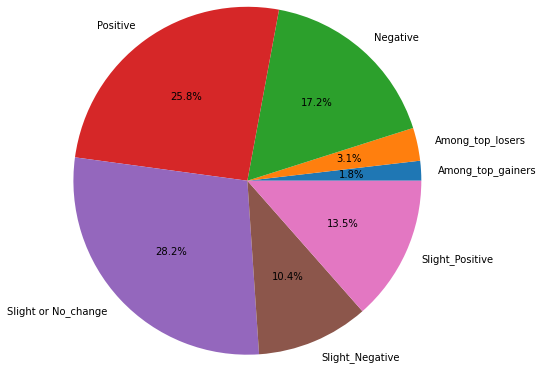

In [14]:
pie_data = df2.groupby('Trend')

pie_label = sorted([i for i in df2.loc[:, 'Trend'].unique()])

plt.pie(pie_data['Trend'].count(), labels = pie_label, autopct = '%1.1f%%', radius = 2)

plt.show()

### ICICI BANK

<AxesSubplot:xlabel='Date'>

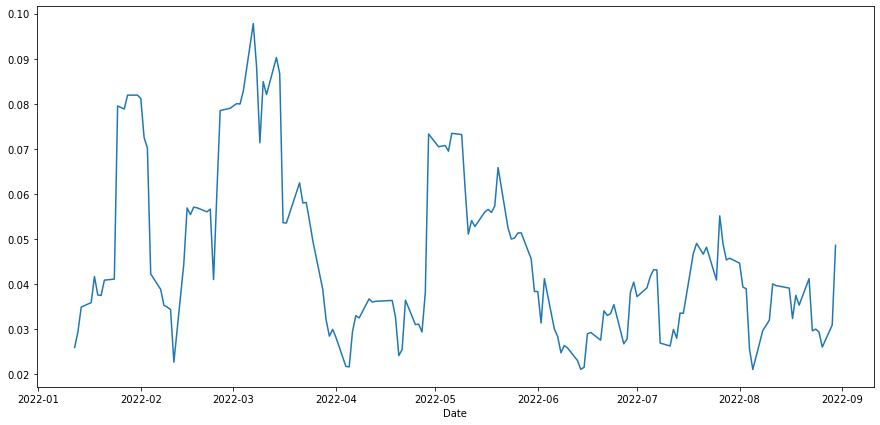

In [15]:
vol = df1['Daily Return'].rolling(7).std()*np.sqrt(7)
vol.plot(figsize = (15,7))

<AxesSubplot:xlabel='Date'>

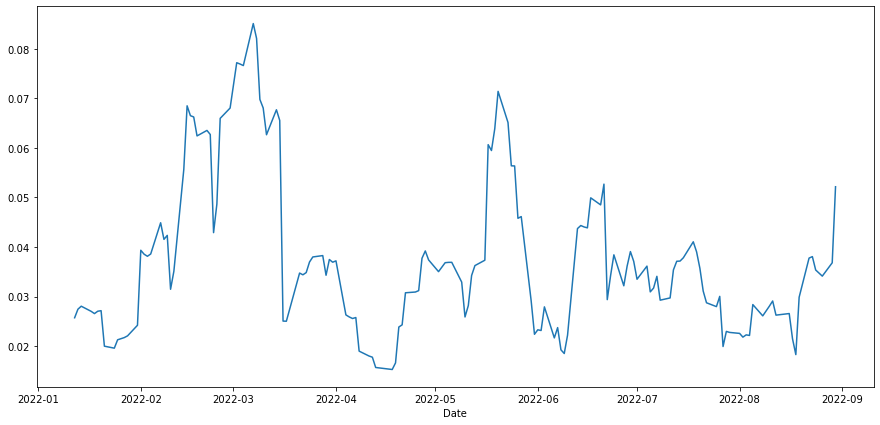

In [16]:
vol = df2['Daily Return'].rolling(7).std()*np.sqrt(7)
vol.plot(figsize = (15,7))

### Scatter plot for both instruments

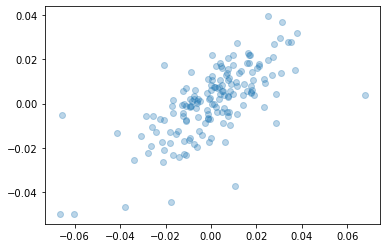

In [17]:
plt.scatter(df1['Daily Return'],df2['Daily Return'],alpha=0.3)